In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Importing DataSets

In [7]:
ufc_masterdf = pd.read_csv('../datasets/ufc-master.csv')
ufc_masterdf.head()

,RedFighter,BlueFighter,RedOdds,BlueOdds,RedExpectedValue,BlueExpectedValue,Date,Location,Country,Winner,...,FinishDetails,FinishRound,FinishRoundTime,TotalFightTimeSecs,RedDecOdds,BlueDecOdds,RSubOdds,BSubOdds,RKOOdds,BKOOdds
0,Alex Pereira,Jamahal Hill,-130.0,110.0,76.9231,110.0000,2024-04-13,"Las Vegas, Nevada, USA",USA,Red,...,Punch,1.0,3:14,194.0,600.0,650.0,2000.0,1400.0,110.0,200.0
1,Zhang Weili,Yan Xiaonan,-455.0,350.0,21.9780,350.0000,2024-04-13,"Las Vegas, Nevada, USA",USA,Red,...,NaN,5.0,5:00,1500.0,200.0,NaN,400.0,NaN,140.0,NaN
2,Justin Gaethje,Max Holloway,-185.0,154.0,54.0541,154.0000,2024-04-13,"Las Vegas, Nevada, USA",USA,Blue,...,Punch,5.0,4:59,1499.0,300.0,250.0,2200.0,1600.0,150.0,550.0
3,Charles Oliveira,Arman Tsarukyan,190.0,-218.0,190.0000,45.8716,2024-04-13,"Las Vegas, Nevada, USA",USA,Blue,...,NaN,3.0,5:00,900.0,900.0,330.0,450.0,700.0,550.0,130.0
4,Bo Nickal,Cody Brundage,-1600.0,900.0,6.2500,900.0000,2024-04-13,"Las Vegas, Nevada, USA",USA,Red,...,Rear Naked Choke,2.0,3:38,518.0,1000.0,3000.0,-135.0,3000.0,150.0,1400.0


## Data Preperation



In [9]:
ufc_masterdf.info

<bound method DataFrame.info of             RedFighter      BlueFighter  RedOdds  BlueOdds  RedExpectedValue  \
0         Alex Pereira     Jamahal Hill   -130.0     110.0           76.9231   
1          Zhang Weili      Yan Xiaonan   -455.0     350.0           21.9780   
2       Justin Gaethje     Max Holloway   -185.0     154.0           54.0541   
3     Charles Oliveira  Arman Tsarukyan    190.0    -218.0          190.0000   
4            Bo Nickal    Cody Brundage  -1600.0     900.0            6.2500   
...                ...              ...      ...       ...               ...   
6183      Duane Ludwig    Darren Elkins   -155.0     135.0           64.5161   
6184       John Howard   Daniel Roberts   -210.0     175.0           47.6190   
6185    Brendan Schaub    Chase Gormley   -260.0     220.0           38.4615   
6186       Mike Pierce    Julio Paulino   -420.0     335.0           23.8095   
6187      Eric Schafer      Jason Brilz    140.0    -160.0          140.0000   

      B

In [22]:
# Checking for missing values in the dataset
missing_values = ufc_masterdf.isnull().sum()

# Display columns with missing values
missing_values[missing_values > 0]


RedOdds                   133
BlueOdds                  134
RedExpectedValue          133
BlueExpectedValue         134
BlueAvgSigStrLanded       930
BlueAvgSigStrPct          765
BlueAvgSubAtt             832
BlueAvgTDLanded           833
BlueAvgTDPct              842
BlueStance                  3
RedAvgSigStrLanded        455
RedAvgSigStrPct           357
RedAvgSubAtt              357
RedAvgTDLanded            357
RedAvgTDPct               367
EmptyArena               1146
BMatchWCRank             5058
RMatchWCRank             4504
RWFlyweightRank          6099
RWFeatherweightRank      6179
RWStrawweightRank        6052
RWBantamweightRank       6041
RHeavyweightRank         6012
RLightHeavyweightRank    6016
RMiddleweightRank        6016
RWelterweightRank        6008
RLightweightRank         6009
RFeatherweightRank       6019
RBantamweightRank        6013
RFlyweightRank           6012
RPFPRank                 5953
BWFlyweightRank          6122
BWFeatherweightRank      6187
BWStrawwei

In [23]:
columns_to_drop = ['RedStance', 'BlueStance', 'RWFlyweightRank', 'RWFeatherweightRank', 'RWStrawweightRank',
                   'RWBantamweightRank', 'RHeavyweightRank', 'RLightHeavyweightRank', 'RMiddleweightRank', 
                   'RWelterweightRank', 'RLightweightRank', 'RFeatherweightRank', 'RBantamweightRank', 
                   'RFlyweightRank', 'RPFPRank', 'BWFlyweightRank', 'BWFeatherweightRank', 'BWStrawweightRank', 
                   'BWBantamweightRank', 'BHeavyweightRank', 'BLightHeavyweightRank', 'BMiddleweightRank', 
                   'BWelterweightRank', 'BLightweightRank', 'BFeatherweightRank', 'BBantamweightRank', 
                   'BFlyweightRank', 'BPFPRank']

ufc_cleaned = ufc_masterdf.drop(columns=columns_to_drop)

# Dropping rows with missing critical values in odds and fight details
ufc_cleaned = ufc_cleaned.dropna(subset=['RedOdds', 'BlueOdds', 'FinishRound', 'TotalFightTimeSecs'])

# Check if we've sufficiently cleaned the data by looking at missing values again
ufc_cleaned.isnull().sum().sum(), ufc_cleaned.shape

(23502, (5423, 90))

## UFC Visualizations

In [25]:
# Create a new column for "Favorite" and "Underdog"
ufc_cleaned['FavoriteOdds'] = ufc_cleaned[['RedOdds', 'BlueOdds']].min(axis=1)
ufc_cleaned['UnderdogOdds'] = ufc_cleaned[['RedOdds', 'BlueOdds']].max(axis=1)

# Create a new column for whether the favorite fighter won
ufc_cleaned['FavoriteWin'] = ((ufc_cleaned['RedOdds'] < ufc_cleaned['BlueOdds']) & (ufc_cleaned['Winner'] == 'Red')) | \
                             ((ufc_cleaned['BlueOdds'] < ufc_cleaned['RedOdds']) & (ufc_cleaned['Winner'] == 'Blue'))

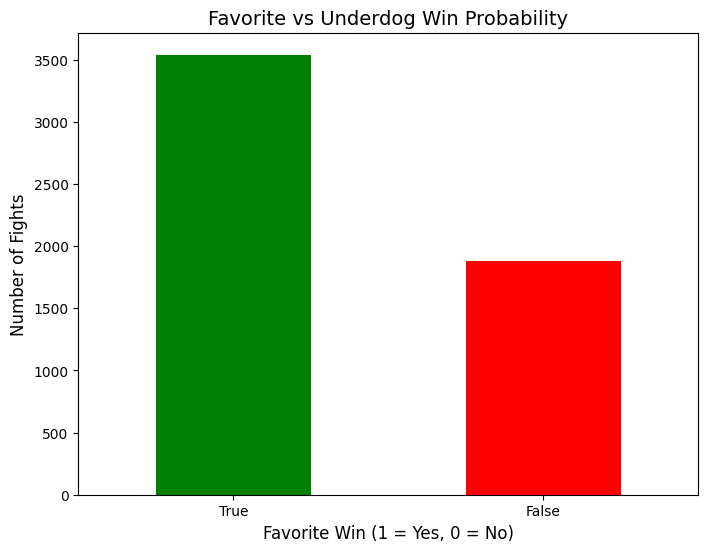

In [26]:
#Favorite vs. Underdog Win Probability
plt.figure(figsize=(8, 6))
ufc_cleaned['FavoriteWin'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Favorite vs Underdog Win Probability', fontsize=14)
plt.xlabel('Favorite Win (1 = Yes, 0 = No)', fontsize=12)
plt.ylabel('Number of Fights', fontsize=12)
plt.xticks(rotation=0)
plt.show()


<Figure size 800x600 with 0 Axes>

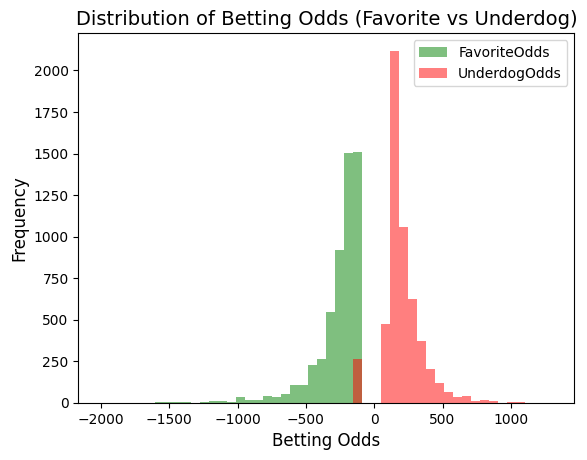

In [27]:
# 2. Distribution of Odds for Favorite and Underdog
plt.figure(figsize=(8, 6))
ufc_cleaned[['FavoriteOdds', 'UnderdogOdds']].plot(kind='hist', alpha=0.5, bins=50, color=['green', 'red'])
plt.title('Distribution of Betting Odds (Favorite vs Underdog)', fontsize=14)
plt.xlabel('Betting Odds', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

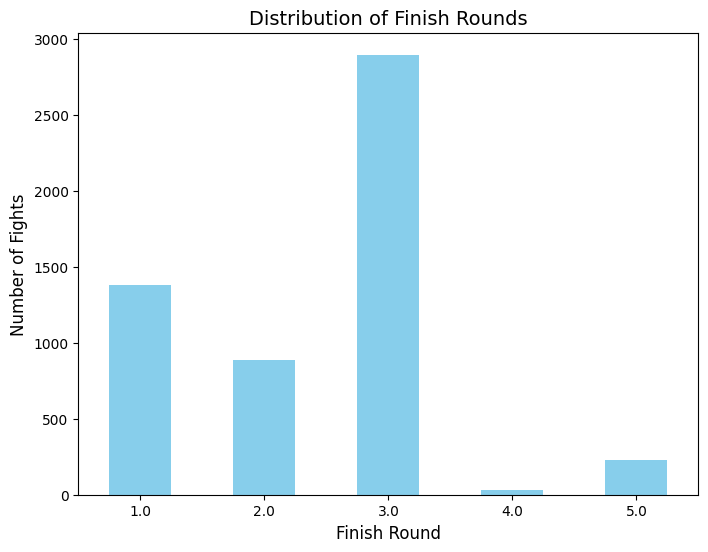

In [28]:
# 1. Finish Round Distribution
plt.figure(figsize=(8, 6))
ufc_cleaned['FinishRound'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Finish Rounds', fontsize=14)
plt.xlabel('Finish Round', fontsize=12)
plt.ylabel('Number of Fights', fontsize=12)
plt.xticks(rotation=0)
plt.show()

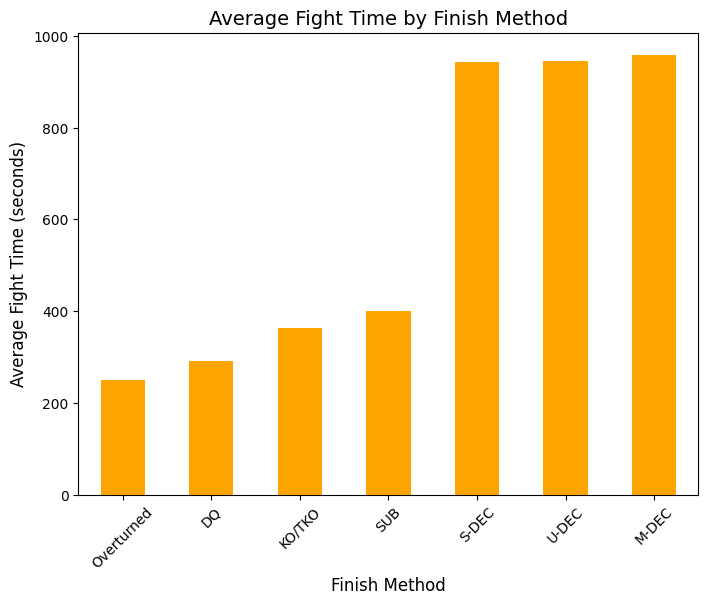

In [30]:
plt.figure(figsize=(8, 6))
ufc_cleaned.groupby('Finish')['TotalFightTimeSecs'].mean().sort_values().plot(kind='bar', color='orange')
plt.title('Average Fight Time by Finish Method', fontsize=14)
plt.xlabel('Finish Method', fontsize=12)
plt.ylabel('Average Fight Time (seconds)', fontsize=12)
plt.xticks(rotation=45)
plt.show()


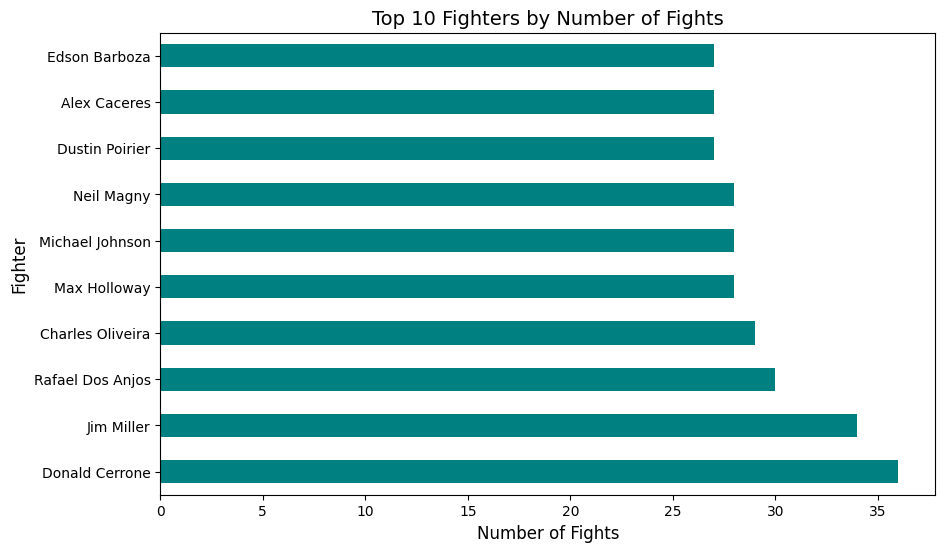

In [33]:
# 1. Top Fighters by Number of Fights (Red + Blue combined)
top_fighters = pd.concat([ufc_cleaned['RedFighter'], ufc_cleaned['BlueFighter']])
top_fighter_counts = top_fighters.value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
top_fighter_counts.plot(kind='barh', color='teal')
plt.title('Top 10 Fighters by Number of Fights', fontsize=14)
plt.xlabel('Number of Fights', fontsize=12)
plt.ylabel('Fighter', fontsize=12)
plt.show()

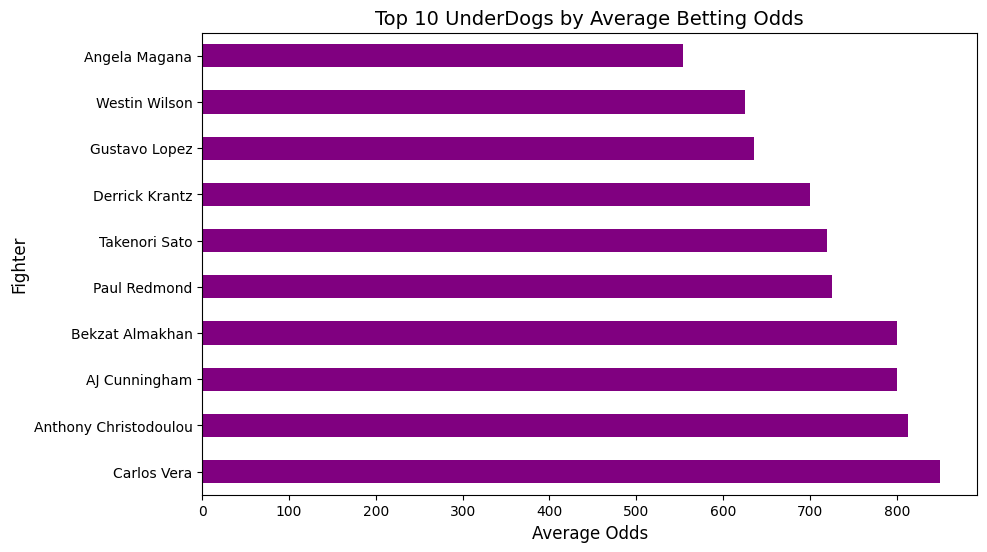

In [44]:
# 3. Average Odds by Top Fighters (Red + Blue combined)
avg_odds_fighter = pd.concat([
    ufc_cleaned[['RedFighter', 'RedOdds']].rename(columns={'RedFighter': 'Fighter', 'RedOdds': 'Odds'}),
    ufc_cleaned[['BlueFighter', 'BlueOdds']].rename(columns={'BlueFighter': 'Fighter', 'BlueOdds': 'Odds'})
])
avg_odds_fighter = avg_odds_fighter.groupby('Fighter')['Odds'].mean().nlargest(10)

plt.figure(figsize=(10, 6))
avg_odds_fighter.plot(kind='barh', color='purple')
plt.title('Top 10 UnderDogs by Average Betting Odds', fontsize=14)
plt.xlabel('Average Odds', fontsize=12)
plt.ylabel('Fighter', fontsize=12)
plt.show()

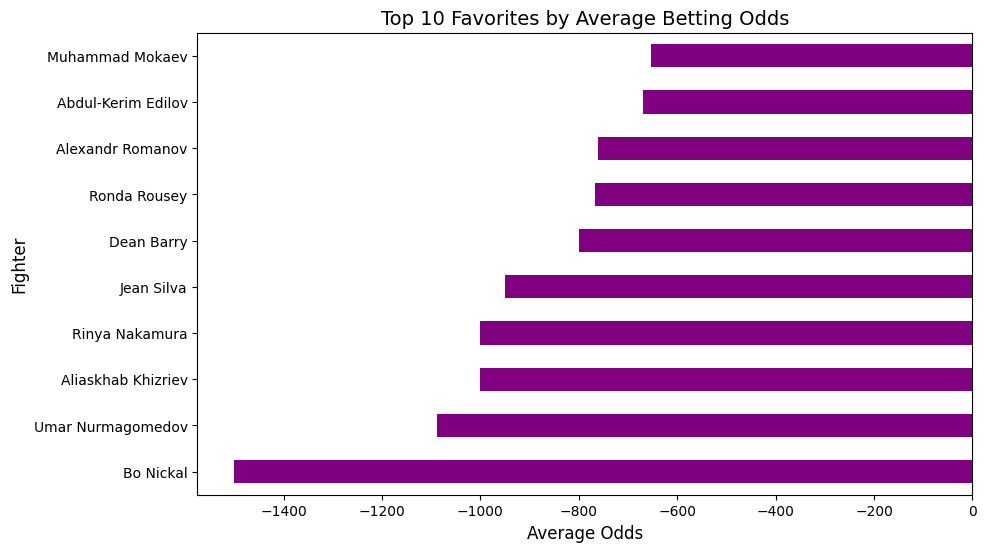

In [45]:
# 3. Average Odds by Top Fighters (Red + Blue combined)
avg_odds_fighter_favorite = pd.concat([
    ufc_cleaned[['RedFighter', 'RedOdds']].rename(columns={'RedFighter': 'Fighter', 'RedOdds': 'Odds'}),
    ufc_cleaned[['BlueFighter', 'BlueOdds']].rename(columns={'BlueFighter': 'Fighter', 'BlueOdds': 'Odds'})
])
avg_odds_fighterfav = avg_odds_fighter_favorite.groupby('Fighter')['Odds'].mean().nsmallest(10)

plt.figure(figsize=(10, 6))
avg_odds_fighterfav.plot(kind='barh', color='purple')
plt.title('Top 10 Favorites by Average Betting Odds', fontsize=14)
plt.xlabel('Average Odds', fontsize=12)
plt.ylabel('Fighter', fontsize=12)
plt.show()

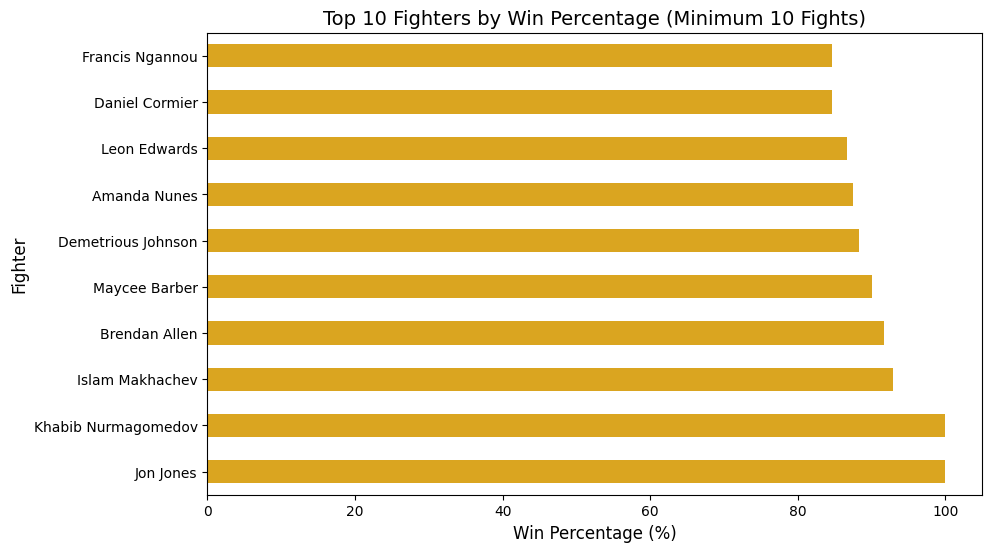

In [47]:
total_fights = pd.concat([ufc_cleaned['RedFighter'], ufc_cleaned['BlueFighter']]).value_counts()

# Counting wins for each fighter (whether they won as Red or Blue)
fighter_wins = pd.concat([
    ufc_cleaned[ufc_cleaned['Winner'] == 'Red']['RedFighter'],
    ufc_cleaned[ufc_cleaned['Winner'] == 'Blue']['BlueFighter']
]).value_counts()

# Calculating win percentage for each fighter
win_percentage = (fighter_wins / total_fights) * 100

# Selecting fighters with at least a certain number of fights (e.g., 10) to avoid small sample sizes
min_fights = 10
top_fighters_win_percentage = win_percentage[total_fights >= min_fights].nlargest(10)

# Plotting top fighters by win percentage
plt.figure(figsize=(10, 6))
top_fighters_win_percentage.plot(kind='barh', color='goldenrod')
plt.title('Top 10 Fighters by Win Percentage (Minimum 10 Fights)', fontsize=14)
plt.xlabel('Win Percentage (%)', fontsize=12)
plt.ylabel('Fighter', fontsize=12)
plt.show()
